In [1]:
import torch

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
#预测模型
def model(t_u, w, b):
    return t_u * w + b

#损失函数
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [4]:
w = torch.ones(1)
b = torch.zeros(1)
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [5]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [6]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

loss_rate_of_change_w

tensor(4517.2979)

In [7]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w
w

tensor([-44.1730])

In [8]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b
b

tensor([46.0250])

In [9]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c)
    return dsq_diffs

In [10]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [11]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, 
                    print_params = True, verbose=1):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b) # 前向传播
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) # 反向传播

        params = params - learning_rate * grad

        if epoch % verbose == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params: ', params)
                print('    Grad  : ', grad)
    return params

In [13]:
training_loop(
            n_epochs = 10,
            learning_rate = 1e-4,
            params = torch.tensor([1.0, 0.0]),
            t_u = t_u,
            t_c = t_c)

Epoch 1, Loss 1763.884644
    Params:  tensor([ 0.5483, -0.0083])
    Grad  :  tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090546
    Params:  tensor([ 0.3623, -0.0118])
    Grad  :  tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params:  tensor([ 0.2858, -0.0135])
    Grad  :  tensor([765.4666,  16.5122])
Epoch 4, Loss 37.552845
    Params:  tensor([ 0.2543, -0.0143])
    Grad  :  tensor([315.0790,   8.5787])
Epoch 5, Loss 30.540285
    Params:  tensor([ 0.2413, -0.0149])
    Grad  :  tensor([129.6733,   5.3127])
Epoch 6, Loss 29.351152
    Params:  tensor([ 0.2360, -0.0153])
    Grad  :  tensor([53.3496,  3.9682])
Epoch 7, Loss 29.148882
    Params:  tensor([ 0.2338, -0.0156])
    Grad  :  tensor([21.9304,  3.4148])
Epoch 8, Loss 29.113848
    Params:  tensor([ 0.2329, -0.0159])
    Grad  :  tensor([8.9964, 3.1869])
Epoch 9, Loss 29.107145
    Params:  tensor([ 0.2325, -0.0162])
    Grad  :  tensor([3.6721, 3.0930])
Epoch 10, Loss 29.105242
    Params:  tensor([ 0.23

tensor([ 0.2324, -0.0166])

In [14]:
t_un = 0.1 * t_u
training_loop(
    n_epochs = 10,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un, # 规范化后的输入
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params:  tensor([1.7761, 0.1064])
    Grad  :  tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574917
    Params:  tensor([2.0848, 0.1303])
    Grad  :  tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params:  tensor([2.2094, 0.1217])
    Grad  :  tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193
    Params:  tensor([2.2616, 0.1004])
    Grad  :  tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507149
    Params:  tensor([2.2853, 0.0740])
    Grad  :  tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.392458
    Params:  tensor([2.2978, 0.0458])
    Grad  :  tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828
    Params:  tensor([2.3059, 0.0168])
    Grad  :  tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717
    Params:  tensor([ 2.3122, -0.0124])
    Grad  :  tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119417
    Params:  tensor([ 2.3178, -0.0417])
    Grad  :  tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030487
    Params:  tensor([ 2.3232, -0.0710])
    Gra

tensor([ 2.3232, -0.0710])

In [15]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
    print_params = False,
    verbose=500)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927831
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


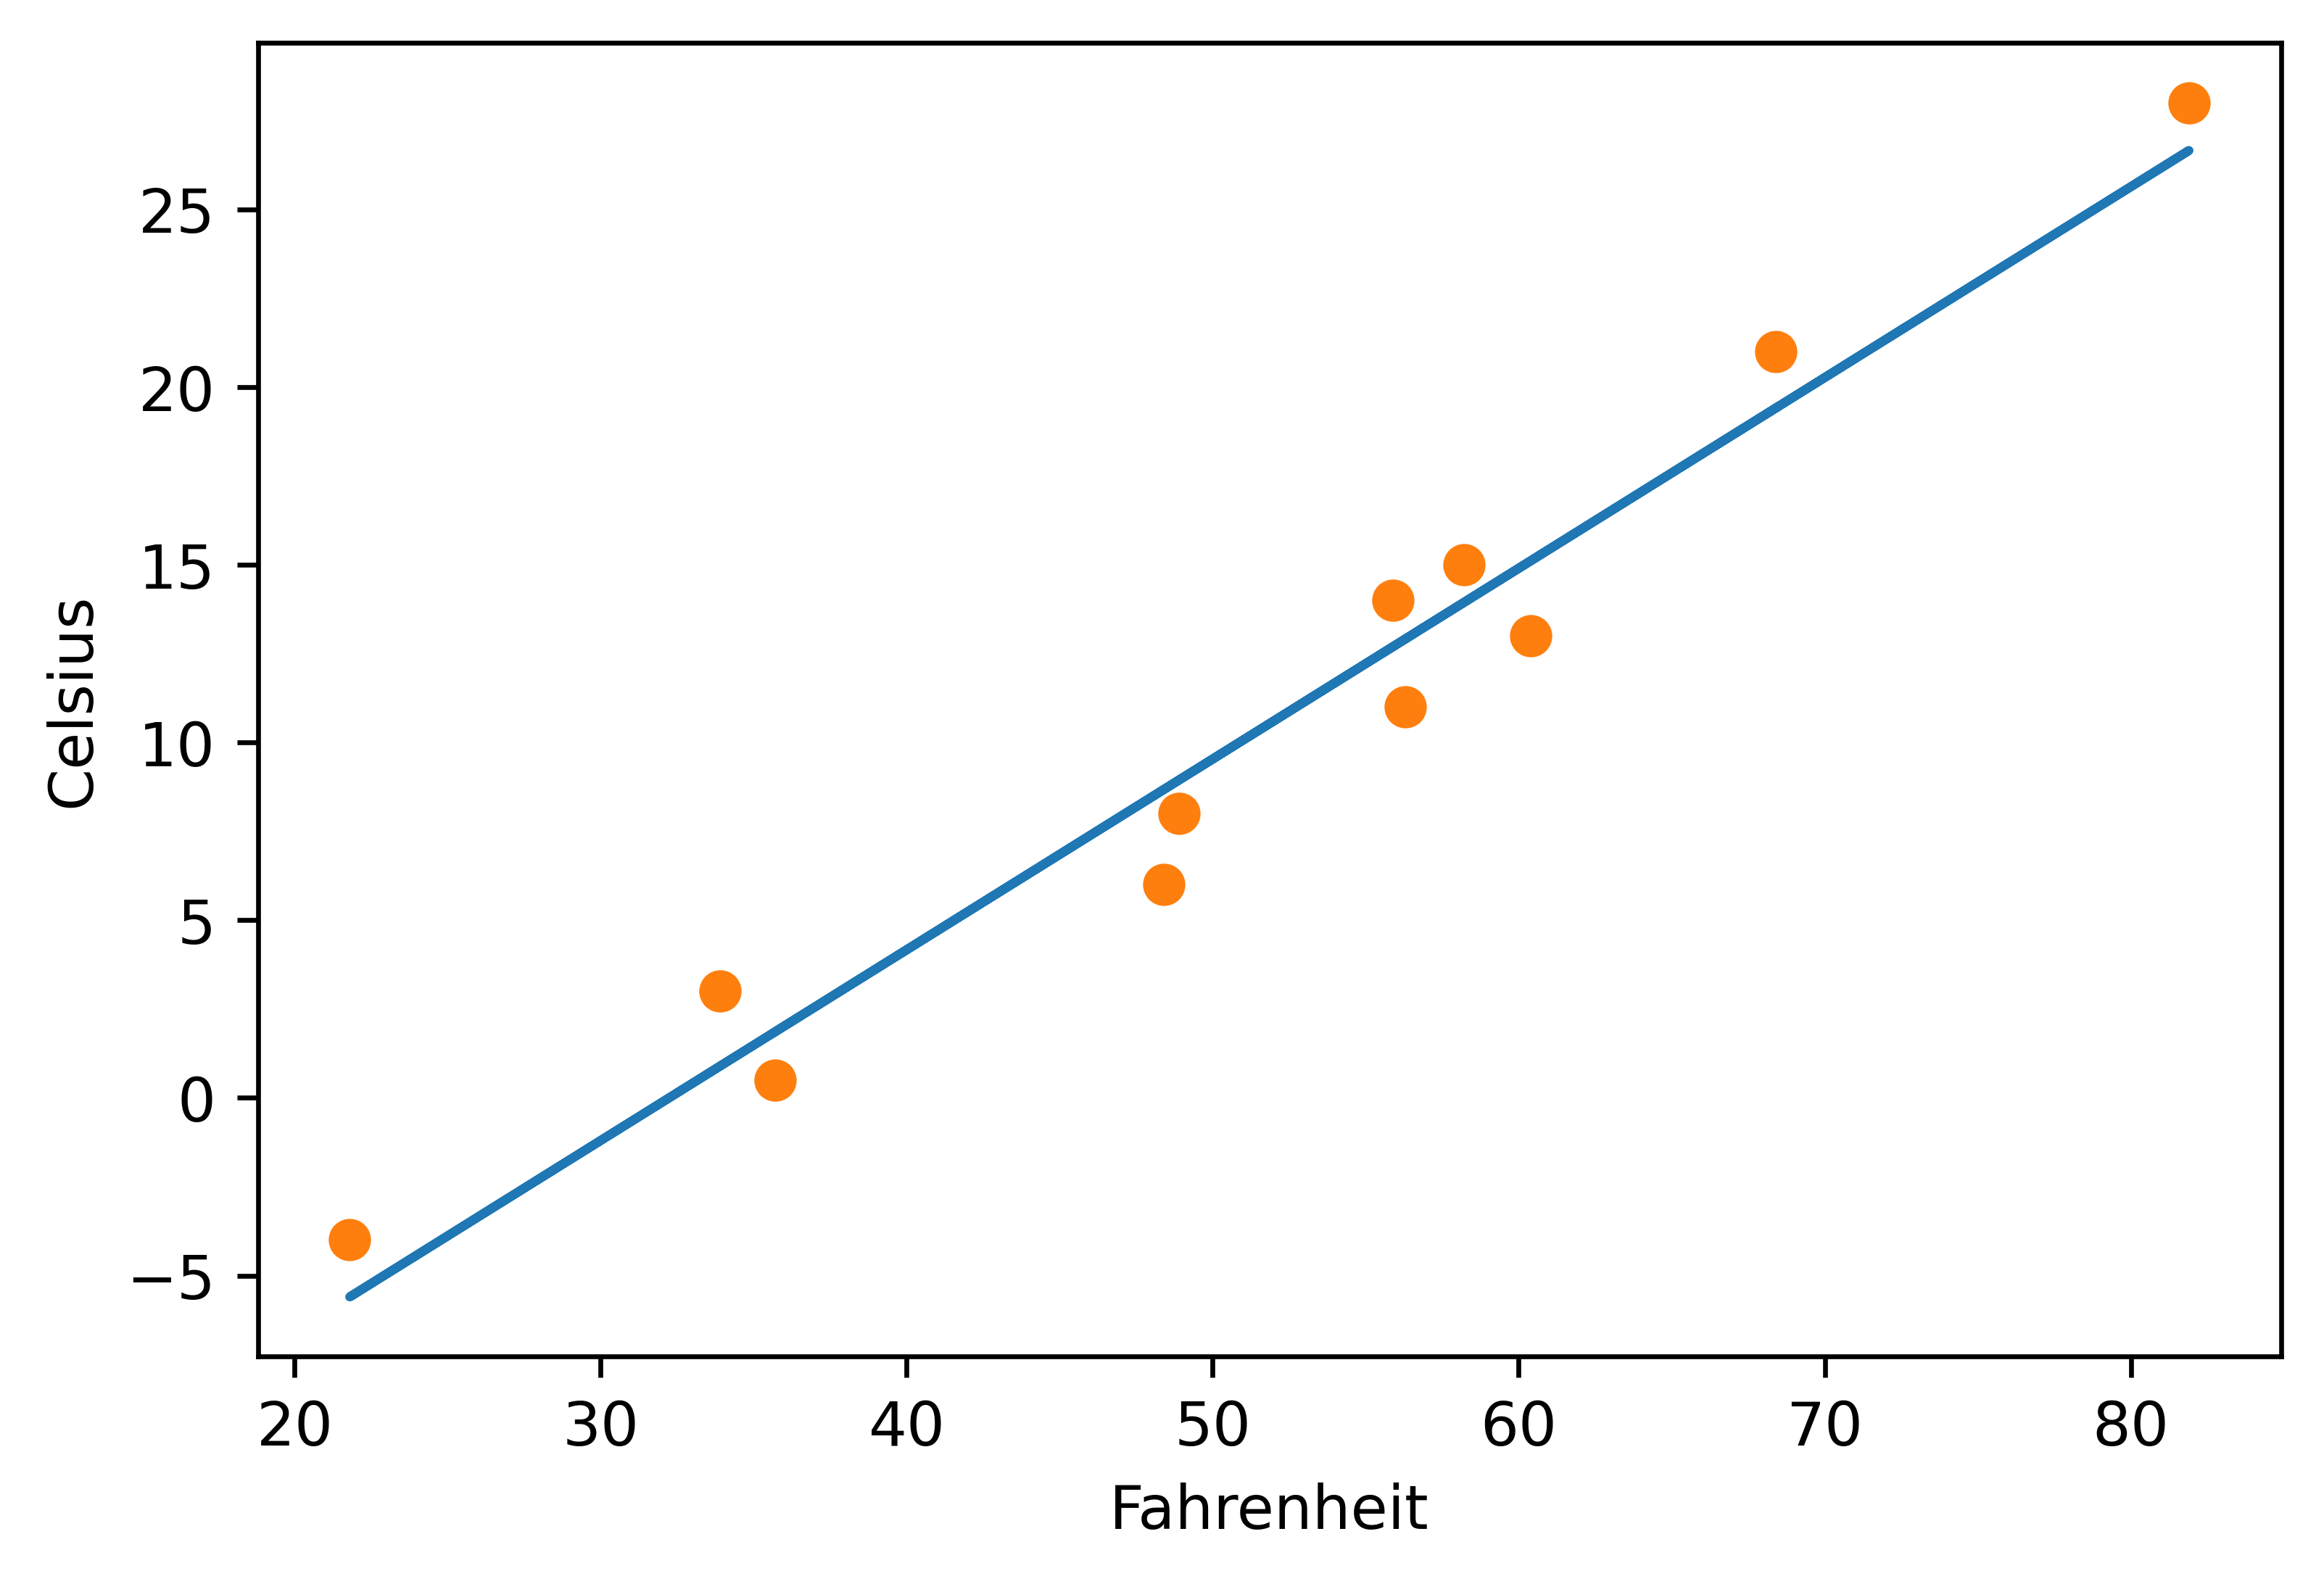

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params) # 记住你是在规范后数据上训练的

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")

plt.plot(t_u.numpy(), t_p.detach().numpy()) # 在原数据上作图
plt.plot(t_u.numpy(), t_c.numpy(), 'o')


In [17]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

In [18]:
params.grad is None # True
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad, loss

(tensor([4517.2969,   82.6000]), tensor(1763.8846, grad_fn=<MeanBackward0>))

In [19]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None: 
            params.grad.zero_() # 这可以在调用backward之前在循环中的任何时候完成
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        # print(params.grad)
        params = (params - learning_rate * params.grad).detach().requires_grad_()
        # print(params)
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [20]:
t_un = 0.1 * t_u
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [21]:
import torch.optim as optim

In [23]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5

In [24]:
optimizer = optim.SGD([params], lr=learning_rate)

In [37]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
# print(params.grad)
optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [45]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [47]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], learning_rate)
training_loop(5000, optimizer, params, t_un, t_c)

Epoch 500, Loss 7.860116
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957697
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [48]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 7.612903
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928578
Epoch 2000, Loss 2.927646


tensor([  0.5367, -17.3021], requires_grad=True)

In [52]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([10,  8,  5,  3,  7,  6,  2,  1,  9]), tensor([4, 0]))

In [53]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [54]:
def training_loop(n_epochs, optimizer, params, 
                  train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        optimizer.zero_grad()
        train_loss.backward() # 注意没有val_loss.backward因为不能在验证集上训练模型
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Training loss %.2f, Validation loss %.2f' % (
                    epoch, float(train_loss), float(val_loss)))
    return params

params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)


Epoch 1, Training loss 93.97, Validation loss 20.67
Epoch 2, Training loss 37.02, Validation loss 30.67
Epoch 3, Training loss 29.49, Validation loss 35.47
Epoch 500, Training loss 7.22, Validation loss 13.35
Epoch 1000, Training loss 3.57, Validation loss 7.12
Epoch 1500, Training loss 2.95, Validation loss 5.28
Epoch 2000, Training loss 2.84, Validation loss 4.65
Epoch 2500, Training loss 2.82, Validation loss 4.40
Epoch 3000, Training loss 2.82, Validation loss 4.31


tensor([  5.2846, -16.4926], requires_grad=True)

In [58]:
def new_model(t_u, w_2, w, b):
    return w_2 * (t_u ** 2) + w * t_u + b

In [63]:
def training_loop(n_epochs, optimizer, params, 
                  train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = new_model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        optimizer.zero_grad()
        train_loss.backward() # 注意没有val_loss.backward因为不能在验证集上训练模型
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            val_t_p = new_model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            print('Epoch %d, Training loss %.2f, Validation loss %.2f' % (
                    epoch, float(train_loss), float(val_loss)))
    return params

new_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([new_params], lr=learning_rate)

training_loop(
    n_epochs = 13000,
    optimizer = optimizer,
    params = new_params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)



Epoch 1, Training loss 721.17, Validation loss 451.56
Epoch 2, Training loss 684.80, Validation loss 432.47
Epoch 3, Training loss 650.30, Validation loss 414.27
Epoch 500, Training loss 11.77, Validation loss 21.31
Epoch 1000, Training loss 11.51, Validation loss 20.86
Epoch 1500, Training loss 11.25, Validation loss 20.42
Epoch 2000, Training loss 11.01, Validation loss 19.99
Epoch 2500, Training loss 10.77, Validation loss 19.58
Epoch 3000, Training loss 10.54, Validation loss 19.17
Epoch 3500, Training loss 10.32, Validation loss 18.78
Epoch 4000, Training loss 10.10, Validation loss 18.39
Epoch 4500, Training loss 9.89, Validation loss 18.02
Epoch 5000, Training loss 9.69, Validation loss 17.66
Epoch 5500, Training loss 9.50, Validation loss 17.30
Epoch 6000, Training loss 9.31, Validation loss 16.96
Epoch 6500, Training loss 9.13, Validation loss 16.63
Epoch 7000, Training loss 8.95, Validation loss 16.30
Epoch 7500, Training loss 8.78, Validation loss 15.98
Epoch 8000, Training 

tensor([ 0.3852,  0.1850, -0.3430], requires_grad=True)